Ejercicio clase 2017

Un vehículo lanzador de tres etapas emplea, para los dos primeros escalones un propulsante derivado de hidrocarburo de Isp= 290s, mientras que para el tercero utiliza uno criogénico de 455s. Todos los escalones tienen un factor estructural de σn = 0,07 y las relaciones másicas de cada etapa cumplen la proporción x1= 1,2∙x2 = 0,65∙x3. Calcúlese las masas de propulsante de cada escalón, requeridas para inyectar una carga útil de 1.000kg en órbita geoestacionaria, siendo necesario un incremento total de velocidad Vi de 13,0 km/s (es decir, los efectos de las pérdidas por gravedad y resistencia aerodinámica, así como el de rotación de la Tierra, están incluidos). Considérese g0=9,81m/s2.

In [4]:
#primero importamos
import numpy as np
#importar numpy para calculo numérico
from sympy import *
#importar sympy para calculo simbolico
init_printing(use_latex=True)
from scipy import optimize

In [5]:
#declaramos variables
#Ispn Impulso específico [s]
Isp1 = symbols('Isp1')
Isp2 = symbols('Isp2')
Isp3 = symbols('Isp2')
#σi factor estructural [adimensional]
o1 = symbols('o1')
o2 = symbols('o2')
o3 = symbols('o3')
#xi relaciones másicas [adimensional] x1=m01/m02 x2=m02/mo3 x3=m03/mpl
x1 = symbols('x1')
x2 = symbols('x2')
x3 = symbols('x3')
#X relación másica misil [adimensional]
X = symbols('X')
#masa carga util (pay load) mpl [kg]
mpl = symbols('mpl')
#incremento total de velocidad [m/s]
VIexpresion = Function('VI')(x1)
VIdato = symbols('VIdato')
#mi masa etapa [kg]
m1 = symbols('m1')
m2 = symbols('m2')
m3 = symbols('m3')
#m0i masa inicial de etapa [kg]
m01 = symbols('m01')
m02 = symbols('m02')
m03 = symbols('m03')
#mpi masa propulsante etapa [kg] mpi=mi(1-σi)
mp1 = symbols('mp1')
mp2 = symbols('mp2')
mp3 = symbols('mp3')
#g0 gravedad g0=9,81m/s2
g0 = symbols('g0')

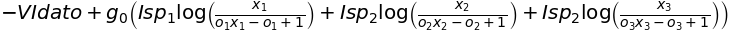

In [6]:
#ecuaciones propias del problema

X = x1*x2*x3

m03=mpl*x3
m02=m03*x2
m01=m02*x1

m1=m01-m02
m2=m02-m03
m3=m03-mpl

mp1=m1*(1-o1)
mp2=m2*(1-o2)
mp3=m3*(1-o3)

VIexpresion = g0*(Isp1*log(x1/(o1*x1+(1-o1)))+Isp2*log(x2/(o2*x2+(1-o2)))+Isp3*log(x3/(o3*x3+(1-o3))))-VIdato
VIexpresion

In [7]:
#Datos del problema Esto es lo que hay que cambiar
Isp1=290 #hidrocarburo
Isp2=290 #hidrocarburo
Isp3=455 #criogenico

g0=9.81

x2=x1/1.2
x3=x1/0.65

o1=0.07
o2=0.07
o3=0.07

mpl=1000

VIdato=13000

In [8]:
#machacamos la ecuación para que coja ya los datos del problema
VIexpresion = g0*(Isp1*log(x1/(o1*x1+(1-o1)))+Isp2*log(x2/(o2*x2+(1-o2)))+Isp3*log(x3/(o3*x3+(1-o3))))-VIdato


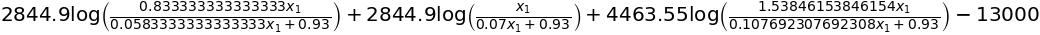

In [9]:
VIexpresion

In [10]:
#lambdify nos convierte la ecuación de Sympy a una normal que se puede resolver numericamente con scipy
VIsolver = lambdify(x1,VIexpresion)


In [11]:
x1= optimize.newton(VIsolver,3)


In [12]:
#sustituimos en las ecuaciones propias del problema



x2=x1/1.2
x3=x1/0.65

m03=mpl*x3
m02=m03*x2
m01=m02*x1

m1=m01-m02
m2=m02-m03
m3=m03-mpl

mp1=m1*(1-o1)
mp2=m2*(1-o2)
mp3=m3*(1-o3)


X=x1*x2*x3

print('x1=',x1,'   ','x2=',x2,'   ','x3=',x3,'   ')
print('X=',X)
print('m01=',m01,'kg','   ','m02=',m02,'kg','   ','m03=',m03,'kg')
print('m1=',m1,'kg','    ','m2=',m2,'kg','    ','m3=',m3,'kg')
print('mp1=',mp1,'kg','   ','mp2=',mp2,'kg','    ','mp3=',mp3,'kg')
print('masa propulsante hidrocarburo=',mp1+mp2,'kg')
print('masa propulsante criogénico=',mp3,'kg')

x1= 3.9304914076594035     x2= 3.2754095063828363     x3= 6.0469098579375435    
X= 77.84772958161739
m01= 77847.72958161739 kg     m02= 19806.106032928714 kg     m03= 6046.909857937543 kg
m1= 58041.62354868867 kg      m2= 13759.196174991172 kg      m3= 5046.909857937543 kg
mp1= 53978.70990028046 kg     mp2= 12796.05244274179 kg      mp3= 4693.626167881915 kg
masa propulsante hidrocarburo= 66774.76234302224 kg
masa propulsante criogénico= 4693.626167881915 kg
